In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/customer_shopping_data.csv')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [27]:
pd.concat([df.head(3), df.tail(3)])

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [28]:
df.dtypes

,0
invoice_no,object
customer_id,object
gender,object
age,int64
category,object
quantity,int64
price,float64
payment_method,object
invoice_date,object
shopping_mall,object


In [29]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
df.dtypes

,0
invoice_no,object
customer_id,object
gender,object
age,int64
category,object
quantity,int64
price,float64
payment_method,object
invoice_date,datetime64[ns]
shopping_mall,object


# Statistical View Of the numerical Data

In [30]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
age,99457.0,43.427089,18.0,30.0,43.0,56.0,69.0,14.990054
quantity,99457.0,3.003429,1.0,2.0,3.0,4.0,5.0,1.413025
price,99457.0,689.256321,5.23,45.45,203.3,1200.32,5250.0,941.184567
invoice_date,99457,2022-02-04 02:46:59.783424,2021-01-01 00:00:00,2021-07-19 00:00:00,2022-02-05 00:00:00,2022-08-22 00:00:00,2023-03-08 00:00:00,NaN


# Statistical View Of the Object Data

In [31]:
df.describe(include = 'object').T

,count,unique,top,freq
invoice_no,99457,99457,I232867,1
customer_id,99457,99457,C273973,1
gender,99457,2,Female,59482
category,99457,8,Clothing,34487
payment_method,99457,3,Cash,44447
shopping_mall,99457,10,Mall of Istanbul,19943


In [32]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

# Missing Values

In [33]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [34]:
df[df.isnull().any(axis=1)]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [35]:
#fill missing values
df['category'] = df['category'].fillna(df['category'].mode()[0])
df['payment_method'] = df['payment_method'].fillna(df['payment_method'].mode()[0])
df['shopping_mall'] = df['shopping_mall'].fillna(df['shopping_mall'].mode()[0])

In [36]:
#fill missing values for numeric column
df['quantity'] = df['quantity'].fillna(df['quantity'].median())
df['price'] = df['price'].fillna(df['price'].median())


In [37]:
#fill missing values for date
df['invoice_date'] = df['invoice_date'].ffill()



In [38]:
df.isnull().sum()


,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:\n", df[col].value_counts(), "\n" + "***" * 5)


invoice_no:
 invoice_no
I232867    1
I887161    1
I522661    1
I161104    1
I662891    1
          ..
I227836    1
I337046    1
I173702    1
I127801    1
I317333    1
Name: count, Length: 99457, dtype: int64 
***************
customer_id:
 customer_id
C273973    1
C137631    1
C776199    1
C363191    1
C180055    1
          ..
C657758    1
C189076    1
C988172    1
C266599    1
C111565    1
Name: count, Length: 99457, dtype: int64 
***************
gender:
 gender
Female    59482
Male      39975
Name: count, dtype: int64 
***************
category:
 category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64 
***************
payment_method:
 payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64 
***************
shopping_mall:
 shopping_mall
Mall of Istanbul     19943

In [41]:
# Column Standardization Process
df.columns = df.columns.str.lower().str.strip().str.replace(' ','_')
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


#Time Series Analysis

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  Total Amount  
0    Credit Card   2022-08-05          Kanyon       7502.00  
1     Debit Card   2021-12-12  Forum Istanbul       5401.53  
2           Cash   2021-11-09       Metrocity        300.08  
3    Credit Card   2021-05-16    Metropol AVM      15004.25  
4           Cash   2021-10-24          Kanyon        242.40  


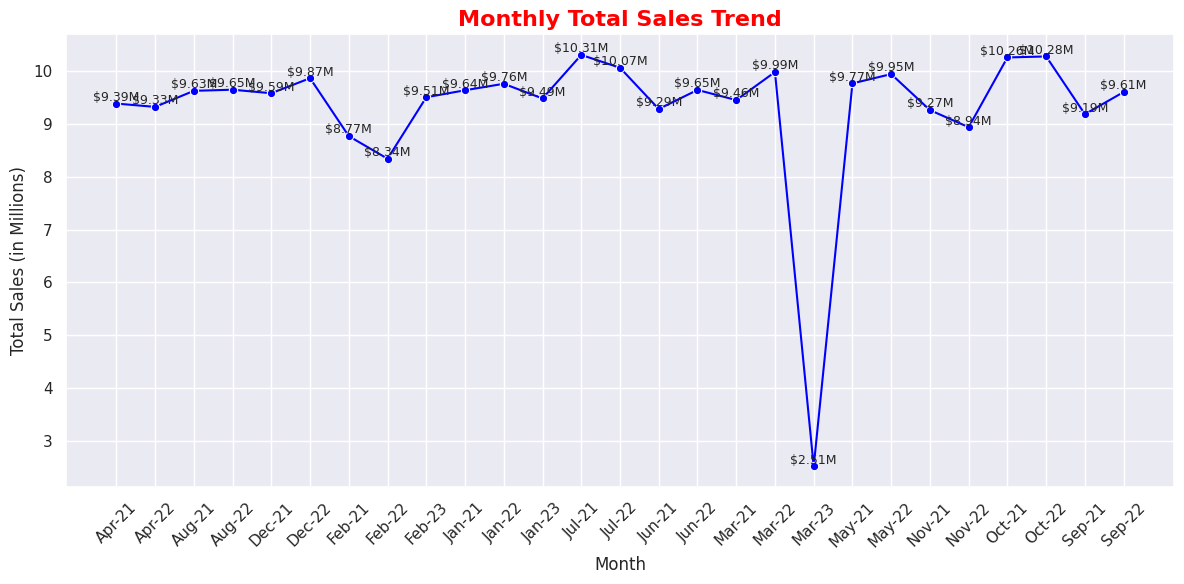

In [43]:
df['Total Amount'] = df['quantity'] * df['price']

print(df.head())

df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

df['Month'] = df['invoice_date'].dt.strftime('%b-%y')

monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()

monthly_sales['Total Amount'] = monthly_sales['Total Amount'] / 1_000_000

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', marker='o', color='blue')

plt.title("Monthly Total Sales Trend", fontsize=16, color='red', weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (in Millions)", fontsize=12)

plt.xticks(rotation=45)

for i in range(len(monthly_sales)):
    plt.text(i, monthly_sales['Total Amount'][i] + 0.05,
             f"${monthly_sales['Total Amount'][i]:.2f}M",
             ha='center', fontsize=9)
plt.tight_layout()
plt.show()


#Customer and Product Analysis

**Top Products**

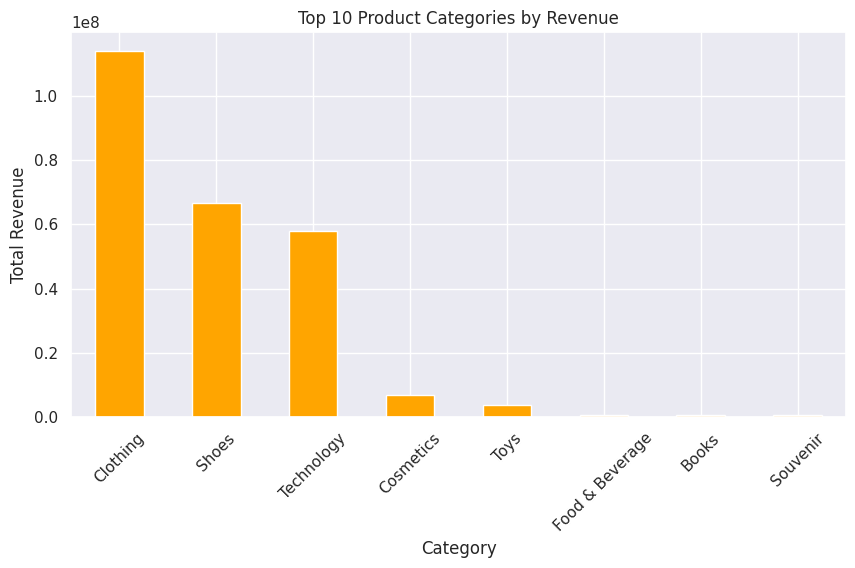

In [44]:
top_products = df.groupby('category')['Total Amount'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Product Categories by Revenue', color='orange')
plt.ylabel('Total Revenue')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


**Gender Analysis**

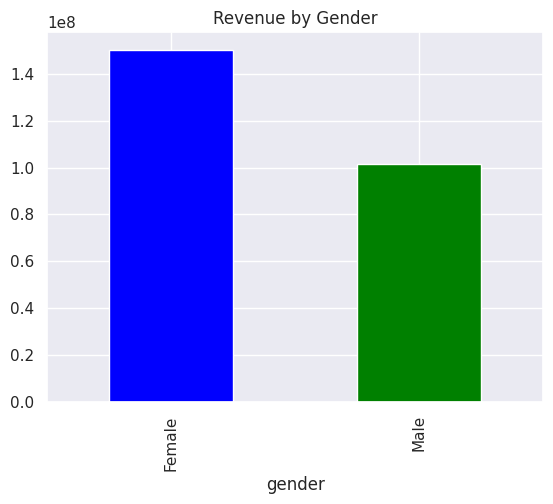

In [45]:
gender_sales = df.groupby('gender')['Total Amount'].sum()
gender_sales.plot(kind='bar', title='Revenue by Gender', color=['blue','green'])
plt.show()


**Age Group Analysis**

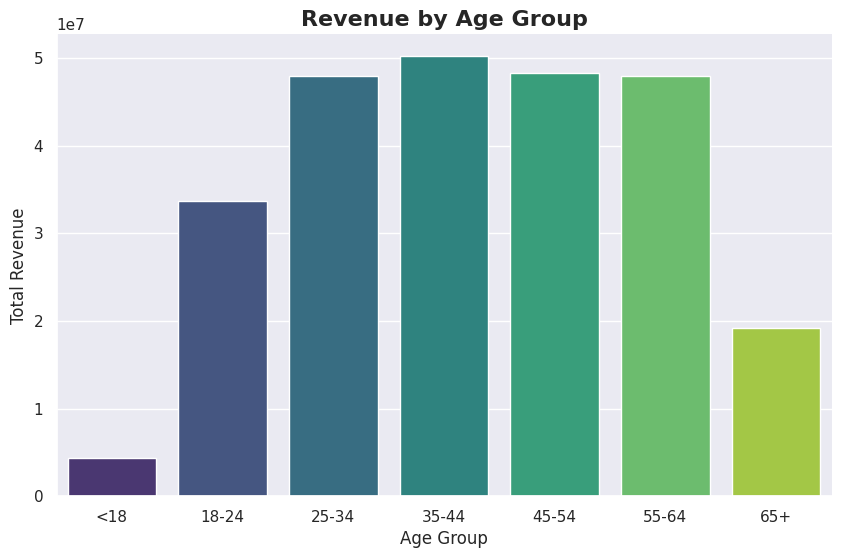

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

bins = [0,18,25,35,45,55,65,100]
labels = ['<18','18-24','25-34','35-44','45-54','55-64','65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

age_sales = df.groupby('age_group', observed=True)['Total Amount'].sum().reset_index()

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=age_sales, x='age_group', y='Total Amount', hue='age_group', palette='viridis', legend=False)

plt.title('Revenue by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

sns.despine()

plt.show()


#Heatmap (Category × Month)

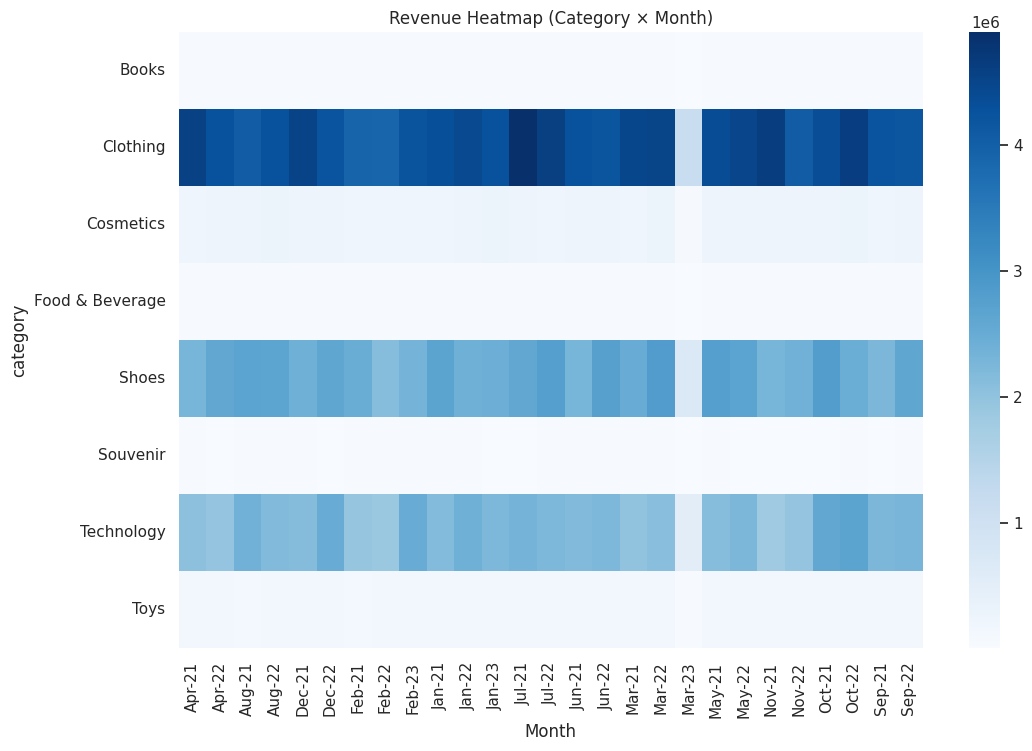

In [47]:
df['Month'] = df['invoice_date'].dt.strftime('%b-%y')
pivot = df.pivot_table(index='category', columns='Month', values='Total Amount', aggfunc='sum').fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap='Blues')
plt.title('Revenue Heatmap (Category × Month)')
plt.show()
